In [2]:
import pandas as pd
import seaborn as sns

In [3]:
transaction_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-ababkov/shared/homeworks/python_ds_miniprojects/5/transaction_data.csv')

In [7]:
#Проверьте, какие значения принимает колонка transaction.
    #Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.
transaction_data.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

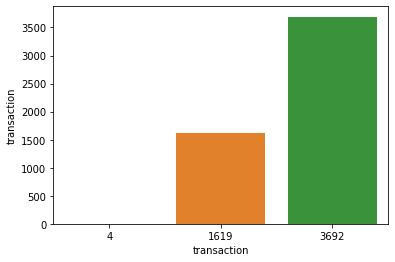

In [8]:
sns.barplot(x=transaction_data.transaction.value_counts(), y=transaction_data.transaction.value_counts())

In [14]:
#Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull
name_success = transaction_data.query('transaction == "successfull"') \
    .groupby('name', as_index = False) \
    .agg({'transaction' : 'count'})

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


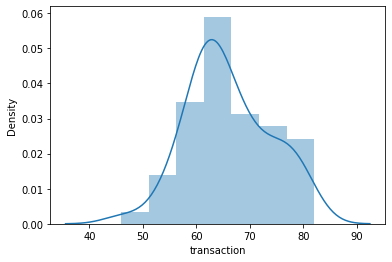

In [16]:
sns.distplot(name_success.transaction)

In [19]:
transaction_data_update = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-ababkov/dataset/transaction_data_updated.csv')

In [27]:
#Сводная таблица
user_vs_minute_pivot = transaction_data_update.groupby(['name', 'minute'], as_index = False) \
    .agg({'transaction' : 'count'}) \
    .pivot(index='minute', columns = 'name', values = 'transaction') \
    .fillna(0)

In [42]:
transaction_data_update['date'] = pd.to_datetime(transaction_data_update.date)

In [48]:
minute = transaction_data_update.date.dt.minute

In [49]:
hour = transaction_data_update.date.dt.hour

In [46]:
transaction_data_update.date.value_counts()

2020-03-02 00:35:03    6
2020-03-02 00:33:10    6
2020-03-02 00:01:41    5
2020-03-02 00:02:47    5
2020-03-02 00:52:25    5
                      ..
2020-03-02 00:20:28    1
2020-03-02 00:20:12    1
2020-03-02 01:07:06    1
2020-03-02 00:18:36    1
2020-03-02 00:07:03    1
Name: date, Length: 3373, dtype: int64

In [53]:
transaction_data_update['true_minute'] = minute + hour * 60